## Creating Own <b style = 'color: orange'>Batch Gradient Descent Model</b>
<b>The "batch" refers to the fact that all data points are processed together in one go</b>

In [2]:
## Importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Setting appreance of graphs
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.titlecolor'] = 'Orange'
plt.rcParams['axes.titleweight'] = 'bold'

<h1 style = 'color : #ccffff'>Creating Dataset</h1>

In [3]:
## setting random seed for reproducibility
np.random.seed(42)

## Creating X variable (height) for dataset
X = np.random.normal(loc = 170, scale = 10, size = 100)

## Creating Y variable (weight) for dataset having some correlation
Y = X * 0.5 + np.random.normal(loc = 0, scale = 5, size = 100)

## Combining X and Y for Dataframe process
data = np.column_stack((X, Y))
print(data)

[[174.96714153  80.40671705]
 [168.61735699  82.20545188]
 [176.47688538  86.52487011]
 [185.23029856  88.60376294]
 [167.65846625  83.02280457]
 [167.65863043  85.8495695 ]
 [185.79212816 102.32699358]
 [177.67434729  89.71006271]
 [165.30525614  83.94038002]
 [175.42560044  87.34057064]
 [165.36582307  73.08905546]
 [165.34270246  82.53878185]
 [172.41962272  86.51096241]
 [150.86719755  87.74980934]
 [152.75082167  75.41360601]
 [164.37712471  83.69629907]
 [159.8716888   79.76228555]
 [173.14247333  80.72784647]
 [160.91975924  86.17399369]
 [155.87696299  81.69814666]
 [184.65648769  96.28340358]
 [167.742237    79.32418122]
 [170.67528205  92.35161258]
 [155.75251814  70.86700375]
 [164.55617275  85.21237185]
 [171.1092259   96.50689108]
 [158.49006423  74.29235049]
 [173.75698018  84.04700144]
 [163.9936131   82.49506338]
 [167.0830625   81.02415298]
 [163.98293388  74.23814978]
 [188.52278185  94.6042058 ]
 [169.86502775  79.62099531]
 [159.42289071  82.07940751]
 [178.22544912

In [4]:
## Creating DataFrame
df = pd.DataFrame(data, columns= ('height', 'weight'))
df

,height,weight
0,174.967142,80.406717
1,168.617357,82.205452
2,176.476885,86.524870
3,185.230299,88.603763
4,167.658466,83.022805
...,...,...
95,155.364851,79.609012
96,172.961203,82.061314
97,172.610553,87.073902
98,170.051135,85.316611


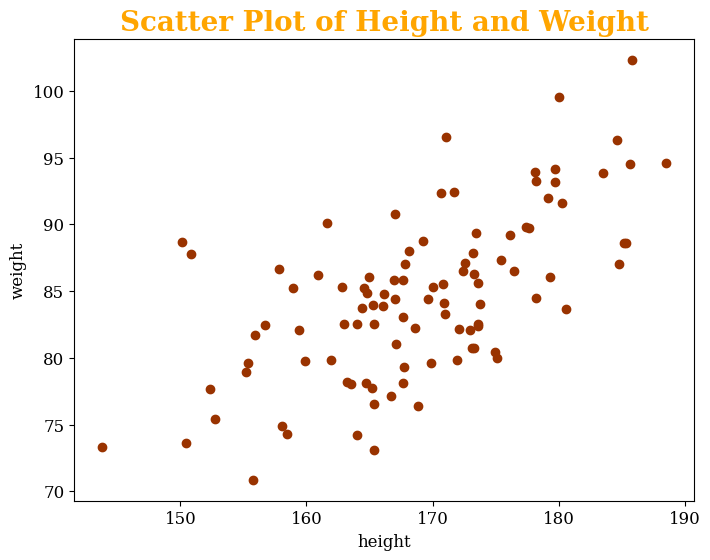

In [5]:
## Creating Scatter Plot for visualzing the relationship
plt.scatter(data = df, x = 'height', y = 'weight', c = '#993300')
plt.title('Scatter Plot of Height and Weight')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

<h3 style = 'color: orange; font-weight: bold'>Creating Class For <b style = 'color: white'>Grading Descent</b></h3>

<h5 style = 'color : #00cc99'>Before Creating Gradient descent We must need to Know some formulas and it's working process in very essence.</h6>
In my own word, i would say Gradient descent is a technique for gettting the line (or parameters of line) that represents the minimum <b>Cost Funtion</b><br>
Or <br>
That is most perfect fitted line b/w X and Y<br>
<h4 style = 'color: red'><b>Diving into Maths</b></h4>
if the line representing relation b/w height and weight is like :<br>
<b style = 'color: green'>Y</b> = <b style = 'color: orange'>m (slope)</b> * <b style = 'color: green'>X</b> + <b style = 'color = yellow'>b (intercept)</b><br>

Then in that case the loss function (MSE) will be: 
<h5 style = 'color : orange'>MSE = Σ(Yi − Yp)² / n</h5>
Here Yi represnts the actual value of Y at point i<br>
and Yp represents the predicted value by our model at point i<br>
Goint further details Yp = m (slope) * Xi + b<br>
So we can write MSE As<br> <b style = 'color : green'>Σ(Yi − (m * Xi + b))²/n</b> ................. (equation I)


Now if u guys have study Graphs for different kinds of function then u propably remeber that graph for X<sup>2</sup> kind of thing is like that:<br>
Y or f(X) = X<sup>2</sup> then it's graph<br><br>
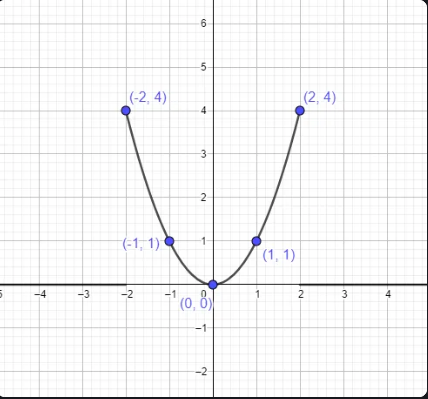<br><br>


similarly if u see then MSE is also a function similar to X<sup>2</sup>. So it's Graph Will also be the same.

<h3 style = 'color : Orange'>What is Our Motive ? </h3>
On this graph we need to find the point where loss is minimum, Simple right?<br><br>
But How would we do that?<br>
Since Our Loss function depends on two factors <b style = 'color : orange'>m</b> and <b style = 'color: green'>b</b>.<br>
So we need to find the loss where the slope is near to 0 for both the components.




In [57]:
class myregressor:

    ## Initializing the Instance of the class
    def __init__(self, lr = 0.00001, epochs = 100):
        self.lr = lr
        self.iter = epochs

    ## Function For Providing the data for Training Purpose
    def fit(self, X, Y):
        self.x = np.asarray(X).ravel()
        self.y = np.asarray(Y).ravel()
        self.m = 0
        self.b = 0

        ## iterating for changing the value
        for i in range(self.iter):
            ## value of prediction line
            Yp = self.m * self.x + self.b

            ## checking Loss
            Loss = np.mean(self.y - Yp)
    
            # defining slope related to the components
            m_slope = -2 * np.mean((self.y - Yp) * self.x)
            b_slope = -2 * np.mean(self.y - Yp)
            
            #New value of m and b
            self.m -= self.lr * m_slope
            self.b -= self.lr * b_slope
        print(f'm_slope: {m_slope}, b_slope: {b_slope}')
        print(f"Loss: {Loss}")
        return self

    ## Defining Prediction method
    def pred(self, X):
        return self.m * np.asarray(X).ravel() + self.b
    
myReg = myregressor()
myReg.fit(df.height, df.weight)
yPred = myReg.pred(df.height)


m_slope: 0.0004110446130107448, b_slope: -0.06964936241455234
Loss: 0.03482468120727617


Here our m_slope and b_slope are very closed to 0 (although c_slope is still steep to negative direction) means we have almost reached our optimum solution , bravo 😎

<h1 style = 'color : orange'>Comparing MyRegressor To <i style = 'color: green'>Linear Regression</i></h1>
<b>Performance Checking</b>

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[['height']], df.weight, test_size = 0.3)

In [59]:
## Checking On My DataSet

from sklearn.metrics import r2_score
my_model = myregressor().fit(X_train, Y_train)
ypred = my_model.pred(X_test)
r2_score(Y_test, ypred)

m_slope: 0.00031194171546888226, b_slope: -0.05279353981920727
Loss: 0.026396769909603636


0.35291839207644693

In [60]:
## Checking On Linear Model Dataset
from sklearn.linear_model import LinearRegression
LinearModel = LinearRegression().fit(X_train, Y_train)
Ypred = LinearModel.predict(X_test)
r2_score(Y_test, Ypred)


0.37473575948194626

<h3>Let's do this process for 10 times and see their average performance</h3>

In [62]:
myReg = []
Linear = []

for i in range(10):
   ## Splitting Dataset in every loop
   X_train, X_test, Y_train, Y_test = train_test_split(df[['height']], df.weight, test_size = 0.3) 

   #1. For myReg
   my_model = myregressor().fit(X_train, Y_train)
   myRegY = my_model.pred(X_test)
   myReg.append(r2_score(Y_test, myRegY))

   ##2. For Linear Reg
   LinearModel = LinearRegression().fit(X_train, Y_train)
   LinearY = LinearModel.predict(X_test)
   Linear.append(r2_score(Y_test, LinearY))
print(f'myReg Average Performance: {np.mean(myReg)}\n'
      f'Linear Regression Performance: {np.mean(Linear)}')


m_slope: 0.0007159508791801273, b_slope: -0.12138246845447774
Loss: 0.06069123422723887
m_slope: 0.000721148452765671, b_slope: -0.12162960101163947
Loss: 0.060814800505819736
m_slope: 8.550403754270519e-05, b_slope: -0.014526888542496052
Loss: 0.007263444271248026
m_slope: 0.0005591592025016975, b_slope: -0.09440531171631993
Loss: 0.04720265585815996
m_slope: 0.0002539476519895548, b_slope: -0.04302565735114042
Loss: 0.02151282867557021
m_slope: 0.0002634268898223776, b_slope: -0.04474158215726537
Loss: 0.022370791078632685
m_slope: 0.0004161585863000385, b_slope: -0.07066997469188761
Loss: 0.03533498734594381
m_slope: 0.00030005637471341675, b_slope: -0.05103590224902185
Loss: 0.025517951124510926
m_slope: 0.00022721287634470044, b_slope: -0.038535034339387104
Loss: 0.019267517169693552
m_slope: 0.0005286591587459303, b_slope: -0.08969192611733498
Loss: 0.04484596305866749
myReg Average Performance: 0.3641396817078504
Linear Regression Performance: 0.3657546136008524


<h1>Graphical Representation

Now Let's check graphically difference between prediction lines (myRegressor Vs LinearRegressor)

m_slope: 0.0004110446130107448, b_slope: -0.06964936241455234
Loss: 0.03482468120727617


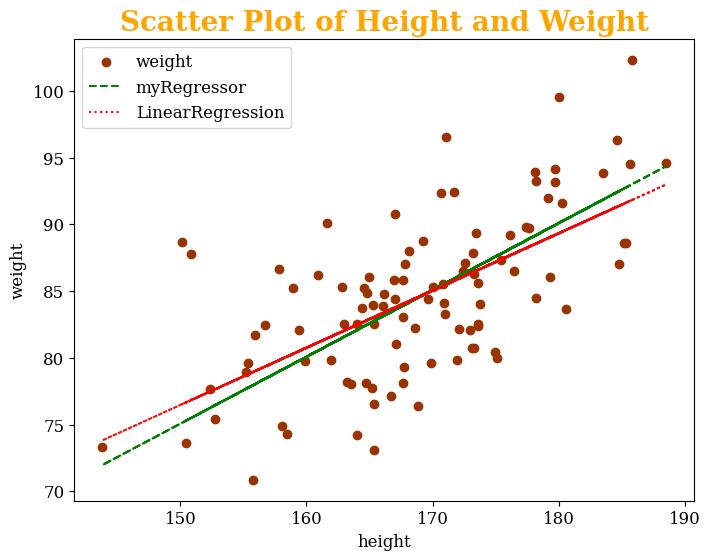

In [63]:
## Fitting the dataset
myReg = myregressor().fit(df.height, df.weight)
LinearModel = LinearRegression().fit(df[['height']], df.weight)

## Getting prediction line for both
myRegY = myReg.pred(df.height)
LinearY = LinearModel.predict(df[['height']])

## Plotting the Graphs
plt.scatter(data = df, x = 'height', y = 'weight', c = '#993300')
plt.plot(df.height, myRegY, 'g--', label = 'myRegressor')
plt.plot(df.height, LinearY, 'r:', label = 'LinearRegression')
plt.title('Scatter Plot of Height and Weight')
plt.legend()
plt.xlabel('height')
plt.ylabel('weight')
plt.show()




## Conclusion: Steps to Creating Our Own Batch Gradient Descent

1. **Understanding the Concept**:
   - We began by learning the fundamentals of gradient descent, focusing on its purpose in minimizing the cost function to find the best-fit line for our data.

2. **Mathematical Foundation**:
   - We explored the mathematical formulation of the Mean Squared Error (MSE) as our loss function, which guided our optimization process.

3. **Setting Up the Environment**:
   - We imported necessary libraries such as NumPy and Pandas to handle data manipulation and mathematical operations.

4. **Data Preparation**:
   - We generated a synthetic dataset with a known relationship between height and weight, ensuring reproducibility by setting a random seed.

5. **Creating the Regressor Class**:
   - We defined a custom class `myregressor` to encapsulate the gradient descent logic, including initialization of parameters (slope and intercept).

6. **Implementing the Fit Method**:
   - We implemented the `fit` method, which iteratively updated the slope and intercept using the calculated gradients, adjusting them based on the learning rate.

7. **Loss Calculation**:
   - During each iteration, we calculated the loss to monitor the model's performance and ensure convergence towards the minimum.

8. **Prediction Method**:
   - We created a `pred` method to make predictions based on the learned parameters, allowing us to evaluate the model's performance on new data.

9. **Comparison with Linear Regression**:
   - We compared our custom implementation with the built-in Linear Regression model from scikit-learn, analyzing the R² scores to assess performance.

10. **Graphical Representation**:
    - We visualized the results through scatter plots, illustrating the prediction lines of both models and highlighting their similarities and differences.

11. **Reflection and Learning**:
    - Through this process, we gained a deeper understanding of the mechanics behind gradient descent and the importance of each component in building a regression model.